In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
from skimage.morphology import skeletonize
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
from math import sqrt



## ***-Image1***

In [3]:

# landmarks
def draw_landmarks(image, plant_data, min_x, min_y):
    for idx, plant in enumerate(plant_data, start=1):
        # Primary root
        pr_start = (plant['primary_root']['V1'][0] - min_x, plant['primary_root']['V1'][1] - min_y)
        cv2.circle(image, pr_start, 10, (0, 255, 0), -1)
        pr_end = (plant['primary_root']['V2'][0] - min_x, plant['primary_root']['V2'][1] - min_y)
        cv2.circle(image, pr_end, 10, (0, 0, 0), -1)
        cv2.line(image, pr_start, pr_end, (0, 255, 0), 2)
        cv2.putText(image, f'Primary Root {idx}', (pr_start[0], pr_start[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Secondary roots
        for sidx, sroot in enumerate(plant['secondary_roots'], start=1):
            sr_start = (sroot['V1'][0] - min_x, sroot['V1'][1] - min_y)
            cv2.circle(image, sr_start, 10, (255, 0, 0), -1)
            sr_end = (sroot['V2'][0] - min_x, sroot['V2'][1] - min_y)
            cv2.circle(image, sr_end, 10, (0, 0, 255), -1)
            cv2.line(image, sr_start, sr_end, (0, 255, 255), 2)
            cv2.putText(image, f'Lateral Root {idx}.{sidx}', (sr_start[0], sr_start[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

In [4]:
# sMAPE Calculation
def calculate_smape(actual, predicted):
    """
    Calculate symmetric mean absolute percentage error (sMAPE).
    """
    absolute_error = np.abs(actual - predicted)
    actual_plus_predicted = np.abs(actual) + np.abs(predicted)
    return 100 * np.mean(2 * absolute_error / actual_plus_predicted)

In [5]:

# plant data
detailed_plants_data = [
    {
        'primary_root': {'length': 675.321, 'V1': (1089, 597, 0), 'V2': (1108, 1228, 0)},
        'secondary_roots': []
    },
    {
        'primary_root': {'length': 1036.375, 'V1': (1604, 585, 0), 'V2': (1611, 1558, 0)},
        'secondary_roots': [
            {'length': 103.397, 'V1': (1561, 789, 0), 'V2': (1621, 725, 0)},
            {'length': 60.012, 'V1': (1565, 841, 0), 'V2': (1612, 811, 0)},
            {'length': 197.179, 'V1': (1611, 639, 0), 'V2': (1711, 767, 0)},
            {'length': 26.799, 'V1': (1620, 864, 0), 'V2': (1640, 879, 0)}
        ]
    },
    {
        'primary_root': {'length': 875.321, 'V1': (2118, 570, 0), 'V2': (2119, 1401, 0)},
        'secondary_roots': [
            {'length': 39.284, 'V1': (2083, 785, 0), 'V2': (2110, 761, 0)}
        ]
    },
    {
        'primary_root': {'length': 973.233, 'V1': (2560, 1519, 0), 'V2': (2635, 605, 0)},
        'secondary_roots': [
            {'length': 111.267, 'V1': (2558, 799, 0), 'V2': (2632, 726, 0)},
            {'length': 185.581, 'V1': (2565, 765, 0), 'V2': (2633, 609, 0)},
            {'length': 26.556, 'V1': (2608, 820, 0), 'V2': (2630, 809, 0)}
        ]
    },
    {
        'primary_root': {'length': 874.931, 'V1': (3158, 597, 0), 'V2': (3260, 1404, 0)},
        'secondary_roots': [
            {'length': 43.527, 'V1': (3119, 802, 0), 'V2': (3151, 777, 0)}
        ]
    }
]


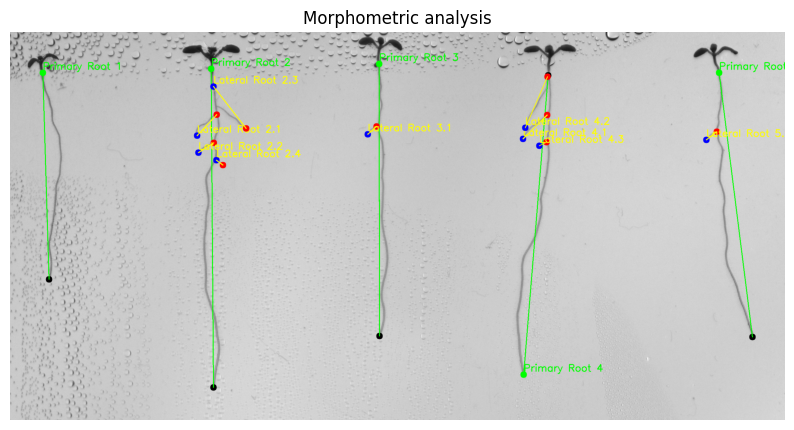


Symmetric Mean Absolute Percentage Error (sMAPE) for Primary Roots: 24.20%


In [6]:

# Load the image
image_path = '/content/drive/MyDrive/Datasets/measurementDataset/measurement_image_1.tif'
image1 = cv2.imread(image_path)

# Determine the cropping area
min_x = min([data['primary_root']['V1'][0] for data in detailed_plants_data] +
            [data['primary_root']['V2'][0] for data in detailed_plants_data]) - 100
max_x = max([data['primary_root']['V1'][0] for data in detailed_plants_data] +
            [data['primary_root']['V2'][0] for data in detailed_plants_data]) + 100
min_y = min([data['primary_root']['V1'][1] for data in detailed_plants_data] +
            [data['primary_root']['V2'][1] for data in detailed_plants_data]) - 100
max_y = max([data['primary_root']['V1'][1] for data in detailed_plants_data] +
            [data['primary_root']['V2'][1] for data in detailed_plants_data]) + 100

cropped_image = image1[min_y:max_y, min_x:max_x]
draw_landmarks(cropped_image, detailed_plants_data, min_x, min_y)

# Display landmarks
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Morphometric analysis')
plt.axis('off')
plt.show()

# Ground truth lengths
ground_truth_lengths = [data['primary_root']['length'] for data in detailed_plants_data]

predicted_lengths = [892.451, 1590.259,  880.139, 1583.566, 850.349]

# Calculate sMAPE for primary roots
smape_primary_root = calculate_smape(np.array(ground_truth_lengths), np.array(predicted_lengths))

print(f"\nSymmetric Mean Absolute Percentage Error (sMAPE) for Primary Roots: {smape_primary_root:.2f}%")

## ***-Image2***

In [7]:
detailed_plants_data = [
    {
        'primary_root': {'length': 988.676, 'V1': (1092, 611, 0), 'V2': (1121, 1542, 0)},
        'secondary_roots': [
            {'length': 155.279, 'V1': (1046, 885, 0), 'V2': (1139, 772, 0)},
            {'length': 84.598, 'V1': (1069, 601, 0), 'V2': (1097, 672, 0)},
            {'length': 6.828, 'V1': (1077, 595, 0), 'V2': (1083, 595, 0)},
            {'length': 132.024, 'V1': (1096, 601, 0), 'V2': (1188, 675, 0)},
            {'length': 19.485, 'V1': (1097, 592, 0), 'V2': (1114, 586, 0)},
            {'length': 19.265, 'V1': (1129, 597, 0), 'V2': (1114, 586, 0)},
            {'length': 259.291, 'V1': (1130, 653, 0), 'V2': (1255, 857, 0)},
            {'length': 131.267, 'V1': (1137, 713, 0), 'V2': (1200, 811, 0)},
            {'length': 103.698, 'V1': (1161, 964, 0), 'V2': (1168, 869, 0)},
            {'length': 76.627, 'V1': (1158, 799, 0), 'V2': (1168, 869, 0)},
            {'length': 3.000, 'V1': (1171, 869, 0), 'V2': (1168, 869, 0)},
            {'length': 12.485, 'V1': (1160, 902, 0), 'V2': (1150, 896, 0)},
            {'length': 4.243, 'V1': (1150, 896, 0), 'V2': (1150, 896, 0)}
        ]
    },
    {
        'primary_root': {'length': 1103.688, 'V1': (1639, 547, 0), 'V2': (1656, 1584, 0)},
        'secondary_roots': [
            {'length': 60.012, 'V1': (1608, 692, 0), 'V2': (1652, 659, 0)},
            {'length': 39.941, 'V1': (1655, 600, 0), 'V2': (1684, 625, 0)},
            {'length': 37.527, 'V1': (1689, 814, 0), 'V2': (1716, 838, 0)}
        ]
    },
    {
        'primary_root': {'length': 969.534, 'V1': (2152, 612, 0), 'V2': (2154, 1531, 0)},
        'secondary_roots': [
            {'length': 191.238, 'V1': (2146, 605, 0), 'V2': (2042, 735, 0)},
            {'length': 116.924, 'V1': (2064, 721, 0), 'V2': (2135, 637, 0)},
            {'length': 97.326, 'V1': (2146, 686, 0), 'V2': (2064, 721, 0)},
            {'length': 63.184, 'V1': (2163, 581, 0), 'V2': (2138, 633, 0)},
            {'length': 35.071, 'V1': (2134, 670, 0), 'V2': (2135, 637, 0)},
            {'length': 25.485, 'V1': (2048, 758, 0), 'V2': (2042, 735, 0)},
            {'length': 20.556, 'V1': (2042, 735, 0), 'V2': (2058, 726, 0)},
            {'length': 14.314, 'V1': (2051, 736, 0), 'V2': (2058, 726, 0)},
            {'length': 14.071, 'V1': (2150, 630, 0), 'V2': (2138, 633, 0)},
            {'length': 8.657, 'V1': (2058, 726, 0), 'V2': (2064, 721, 0)},
            {'length': 5.828, 'V1': (2135, 637, 0), 'V2': (2138, 633, 0)},
            {'length': 15.243, 'V1': (2149, 548, 0), 'V2': (2163, 545, 0)},
            {'length': 37.87, 'V1': (2159, 576, 0), 'V2': (2164, 548, 0)},
            {'length': 147.238, 'V1': (2169, 750, 0), 'V2': (2267, 842, 0)}
        ]
    },
    {
        'primary_root': {'length': 946.25, 'V1': (2639, 1451, 0), 'V2': (2699, 547, 0)},
        'secondary_roots': [
            {'length': 8.657, 'V1': (2685, 602, 0), 'V2': (2692, 598, 0)},
            {'length': 77.912, 'V1': (2696, 668, 0), 'V2': (2738, 723, 0)}
        ]
    },
    {
        'primary_root': {'length': 1004.09, 'V1': (3191, 553, 0), 'V2': (3198, 1502, 0)},
        'secondary_roots': [
            {'length': 65.113, 'V1': (3126, 593, 0), 'V2': (3181, 570, 0)},
            {'length': 89.326, 'V1': (3133, 894, 0), 'V2': (3207, 857, 0)},
            {'length': 121.74, 'V1': (3150, 782, 0), 'V2': (3193, 685, 0)},
            {'length': 14.314, 'V1': (3170, 613, 0), 'V2': (3178, 602, 0)},
            {'length': 42.527, 'V1': (3177, 1239, 0), 'V2': (3210, 1216, 0)},
            {'length': 98.125, 'V1': (3228, 780, 0), 'V2': (3280, 856, 0)}
        ]
    }
]


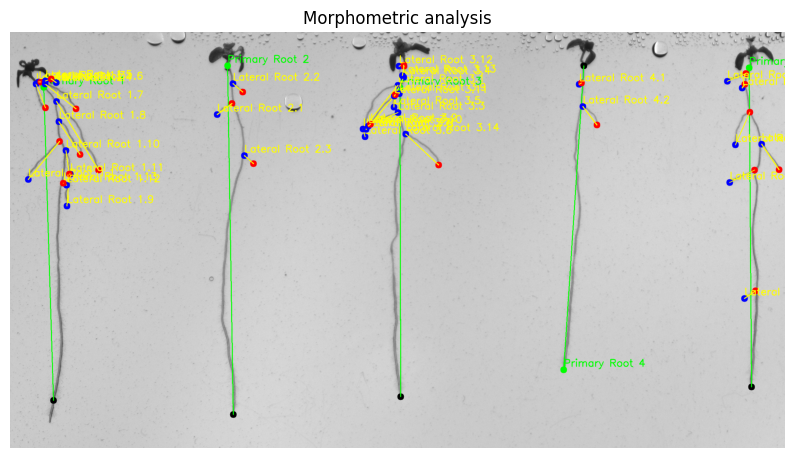


Symmetric Mean Absolute Percentage Error (sMAPE) for Primary Roots: 4.19%


In [8]:
# Load the image
image_path = '/content/drive/MyDrive/Datasets/measurementDataset/measurement_image_2.tif'
image2 = cv2.imread(image_path)

# cropping area
min_x = min([data['primary_root']['V1'][0] for data in detailed_plants_data] +
            [data['primary_root']['V2'][0] for data in detailed_plants_data]) - 100
max_x = max([data['primary_root']['V1'][0] for data in detailed_plants_data] +
            [data['primary_root']['V2'][0] for data in detailed_plants_data]) + 100
min_y = min([data['primary_root']['V1'][1] for data in detailed_plants_data] +
            [data['primary_root']['V2'][1] for data in detailed_plants_data]) - 100
max_y = max([data['primary_root']['V1'][1] for data in detailed_plants_data] +
            [data['primary_root']['V2'][1] for data in detailed_plants_data]) + 100

cropped_image = image2[min_y:max_y, min_x:max_x]
draw_landmarks(cropped_image, detailed_plants_data, min_x, min_y)

# Display landmarks
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Morphometric analysis')
plt.axis('off')
plt.show()

# Ground truth lengths
ground_truth_lengths = [data['primary_root']['length'] for data in detailed_plants_data]

predicted_lengths = [975, 1050, 880, 960, 970]

# Calculate sMAPE for primary roots
smape_primary_root = calculate_smape(np.array(ground_truth_lengths), np.array(predicted_lengths))

print(f"\nSymmetric Mean Absolute Percentage Error (sMAPE) for Primary Roots: {smape_primary_root:.2f}%")


## ***-Image3***

In [9]:
detailed_plants_data = [
    {
        'primary_root': {
            'V1': (950, 2590),
            'V2': (1135, 659),
            'length': 2087.987
        },
        'secondary_roots': [
            {'V1': (970, 2094), 'V2': (983, 2089), 'length': 15.071},
            {'V1': (980, 1753), 'V2': (1043, 1670), 'length': 112.61},
            {'V1': (1040, 1858), 'V2': (1063, 1876), 'length': 31.627},
            {'V1': (1046, 1016), 'V2': (1143, 748), 'length': 323.794},
            {'V1': (1100, 1282), 'V2': (1106, 1280), 'length': 6.828},
            {'V1': (1129, 1189), 'V2': (1136, 1192), 'length': 8.243},
            {'V1': (1139, 660), 'V2': (1365, 965), 'length': 416.772},
            {'V1': (1165, 797), 'V2': (1321, 989), 'length': 289.664},
            {'V1': (1180, 1079), 'V2': (1251, 1511), 'length': 469.794},
            {'V1': (1182, 890), 'V2': (1331, 1270), 'length': 498.144}
        ]
    },
    {
        'primary_root': {'length': 1832.311, 'V1': (1657, 581, 0), 'V2': (1536, 2311, 0)},
        'secondary_roots': [
            {'length': 51.355, 'V1': (1496, 1758, 0), 'V2': (1537, 1733, 0)},
            {'length': 6.243, 'V1': (1523, 1893, 0), 'V2': (1528, 1890, 0)},
            {'length': 7.828, 'V1': (1583, 1280, 0), 'V2': (1590, 1278, 0)},
            {'length': 210.451, 'V1': (1613, 1064, 0), 'V2': (1643, 926, 0)},
            {'length': 8.657, 'V1': (1622, 1081, 0), 'V2': (1629, 1077, 0)},
            {'length': 210.995, 'V1': (1662, 581, 0), 'V2': (1732, 753, 0)},
            {'length': 165.723, 'V1': (1887, 992, 0), 'V2': (1803, 864, 0)},
            {'length': 140.953, 'V1': (1672, 800, 0), 'V2': (1791, 853, 0)},
            {'length': 132.338, 'V1': (1654, 660, 0), 'V2': (1732, 753, 0)},
            {'length': 118.196, 'V1': (1733, 762, 0), 'V2': (1791, 853, 0)},
            {'length': 36.816, 'V1': (1828, 888, 0), 'V2': (1803, 864, 0)},
            {'length': 32.828, 'V1': (1731, 794, 0), 'V2': (1733, 762, 0)},
            {'length': 10.243, 'V1': (1732, 753, 0), 'V2': (1733, 762, 0)},
            {'length': 9.848, 'V1': (1798, 858, 0), 'V2': (1803, 864, 0)},
            {'length': 9.071, 'V1': (1791, 853, 0), 'V2': (1798, 858, 0)},
            {'length': 8.952, 'V1': (1798, 858, 0), 'V2': (1803, 864, 0)},
            {'length': 7.405, 'V1': (1803, 864, 0), 'V2': (1803, 864, 0)}
        ]
    },
    {
        'primary_root': {'length': 2000.276, 'V1': (1956, 2587, 0), 'V2': (2157, 723, 0)},
        'secondary_roots': [
            {'length': 498.434, 'V1': (1945, 1888, 0), 'V2': (1978, 1459, 0)},
            {'length': 25.485, 'V1': (1960, 1617, 0), 'V2': (1983, 1623, 0)},
            {'length': 190.267, 'V1': (1961, 1420, 0), 'V2': (1972, 1259, 0)},
            {'length': 165.368, 'V1': (2031, 1132, 0), 'V2': (1973, 1255, 0)},
            {'length': 117.385, 'V1': (1979, 1371, 0), 'V2': (1972, 1259, 0)},
            {'length': 59.113, 'V1': (2018, 1228, 0), 'V2': (1973, 1255, 0)},
            {'length': 4.414, 'V1': (1972, 1259, 0), 'V2': (1973, 1255, 0)},
            {'length': 32.799, 'V1': (1970, 1898, 0), 'V2': (1997, 1912, 0)},
            {'length': 114.225, 'V1': (2013, 957, 0), 'V2': (2105, 909, 0)},
            {'length': 574.546, 'V1': (2022, 1362, 0), 'V2': (2086, 1847, 0)},
            {'length': 36.87, 'V1': (2067, 1082, 0), 'V2': (2096, 1101, 0)},
            {'length': 504.926, 'V1': (2468, 1492, 0), 'V2': (2218, 1102, 0)},
            {'length': 198.149, 'V1': (2099, 955, 0), 'V2': (2214, 1100, 0)},
            {'length': 163.894, 'V1': (2085, 1020, 0), 'V2': (2214, 1100, 0)},
            {'length': 30.213, 'V1': (2238, 1121, 0), 'V2': (2218, 1102, 0)},
            {'length': 4.828, 'V1': (2214, 1100, 0), 'V2': (2218, 1102, 0)},
            {'length': 85.64, 'V1': (2104, 779, 0), 'V2': (2154, 717, 0)},
            {'length': 260.262, 'V1': (2159, 820, 0), 'V2': (2354, 962, 0)},
            {'length': 913.531, 'V1': (2574, 1368, 0), 'V2': (2228, 647, 0)},
            {'length': 29.385, 'V1': (2178, 663, 0), 'V2': (2202, 650, 0)}
        ]
    },
    {
        'primary_root': {'length': 1685.997, 'V1': (2634, 727, 0), 'V2': (2653, 2242, 0)},
        'secondary_roots': [
            {'length': 525.73, 'V1': (2428, 1554, 0), 'V2': (2615, 1119, 0)},
            {'length': 58.527, 'V1': (2567, 1909, 0), 'V2': (2592, 1862, 0)},
            {'length': 76.213, 'V1': (2595, 1910, 0), 'V2': (2586, 1980, 0)},
            {'length': 36.728, 'V1': (2573, 2026, 0), 'V2': (2582, 1993, 0)},
            {'length': 32.828, 'V1': (2583, 2024, 0), 'V2': (2582, 1993, 0)},
            {'length': 22.385, 'V1': (2600, 1964, 0), 'V2': (2586, 1980, 0)},
            {'length': 14.657, 'V1': (2582, 1993, 0), 'V2': (2586, 1980, 0)},
            {'length': 521.328, 'V1': (2574, 1354, 0), 'V2': (2605, 1755, 0)},
            {'length': 486.948, 'V1': (2590, 1473, 0), 'V2': (2733, 1887, 0)},
            {'length': 74.657, 'V1': (2602, 2091, 0), 'V2': (2606, 2018, 0)},
            {'length': 16.728, 'V1': (2606, 2082, 0), 'V2': (2615, 2069, 0)},
            {'length': 44.284, 'V1': (2609, 1978, 0), 'V2': (2629, 2014, 0)},
            {'length': 11, 'V1': (2618, 2080, 0), 'V2': (2618, 2091, 0)},
            {'length': 345.693, 'V1': (2640, 1188, 0), 'V2': (2644, 903, 0)},
            {'length': 760.477, 'V1': (3106, 1429, 0), 'V2': (2785, 805, 0)},
            {'length': 603.683, 'V1': (3023, 1306, 0), 'V2': (2785, 805, 0)},
            {'length': 142.882, 'V1': (2701, 714, 0), 'V2': (2781, 801, 0)},
            {'length': 123.066, 'V1': (2701, 714, 0), 'V2': (2781, 801, 0)},
            {'length': 57.113, 'V1': (2647, 735, 0), 'V2': (2695, 713, 0)},
            {'length': 21.971, 'V1': (2680, 703, 0), 'V2': (2695, 713, 0)},
            {'length': 6.414, 'V1': (2695, 713, 0), 'V2': (2701, 714, 0)},
            {'length': 6.243, 'V1': (2781, 801, 0), 'V2': (2785, 805, 0)}
        ]
    },
    {
        'primary_root': {'length': 1851.909, 'V1': (3198, 561, 0), 'V2': (3307, 2299, 0)},
        'secondary_roots': [
            {'length': 208.066, 'V1': (3112, 812, 0), 'V2': (3202, 650, 0)},
            {'length': 18.071, 'V1': (3183, 711, 0), 'V2': (3199, 706, 0)},
            {'length': 220.179, 'V1': (3183, 841, 0), 'V2': (3295, 1006, 0)},
            {'length': 178.622, 'V1': (3208, 728, 0), 'V2': (3316, 849, 0)}
        ]
    }
]

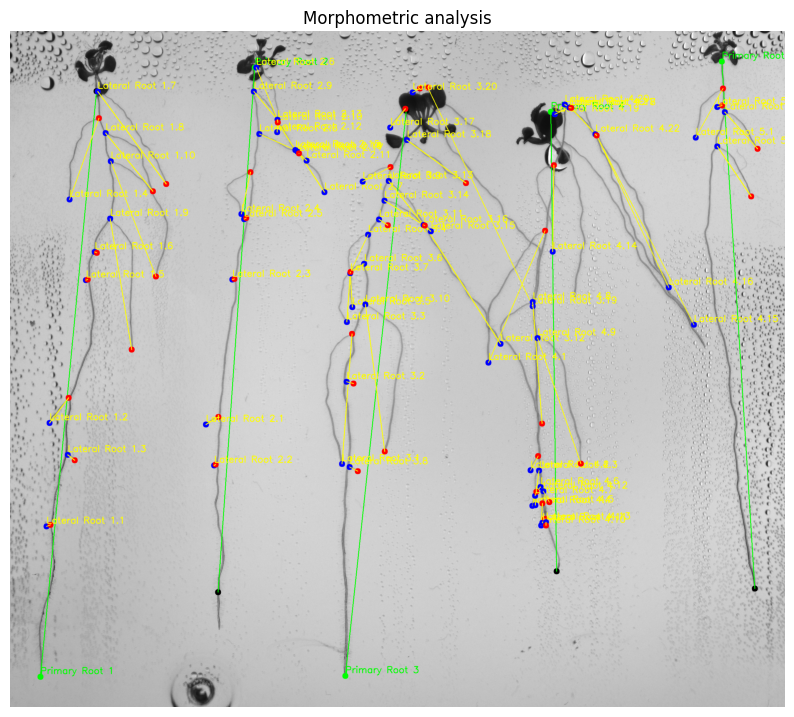


Symmetric Mean Absolute Percentage Error (sMAPE) for Primary Roots: 32.75%


In [10]:
# Load the image
image_path = '/content/drive/MyDrive/Datasets/measurementDataset/measurement_image_3.tif'
image3 = cv2.imread(image_path)

# cropping area
min_x = min([data['primary_root']['V1'][0] for data in detailed_plants_data] +
            [data['primary_root']['V2'][0] for data in detailed_plants_data]) - 100
max_x = max([data['primary_root']['V1'][0] for data in detailed_plants_data] +
            [data['primary_root']['V2'][0] for data in detailed_plants_data]) + 100
min_y = min([data['primary_root']['V1'][1] for data in detailed_plants_data] +
            [data['primary_root']['V2'][1] for data in detailed_plants_data]) - 100
max_y = max([data['primary_root']['V1'][1] for data in detailed_plants_data] +
            [data['primary_root']['V2'][1] for data in detailed_plants_data]) + 100

cropped_image = image3[min_y:max_y, min_x:max_x]
draw_landmarks(cropped_image, detailed_plants_data, min_x, min_y)

# Display landmarks
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Morphometric analysis')
plt.axis('off')
plt.show()

# Ground truth lengths
ground_truth_lengths = [data['primary_root']['length'] for data in detailed_plants_data]

predicted_lengths = [975,1850, 1880, 1360, 970]

# Calculate sMAPE for primary roots
smape_primary_root = calculate_smape(np.array(ground_truth_lengths), np.array(predicted_lengths))

print(f"\nSymmetric Mean Absolute Percentage Error (sMAPE) for Primary Roots: {smape_primary_root:.2f}%")